In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [24]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
data=pd.read_csv(r'C:\Users\DELL\Downloads\AI LAb\Datasets\Food_Delivery_Times.csv')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [28]:
data.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [29]:
data.dropna(inplace=True)

In [30]:
data.isna().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

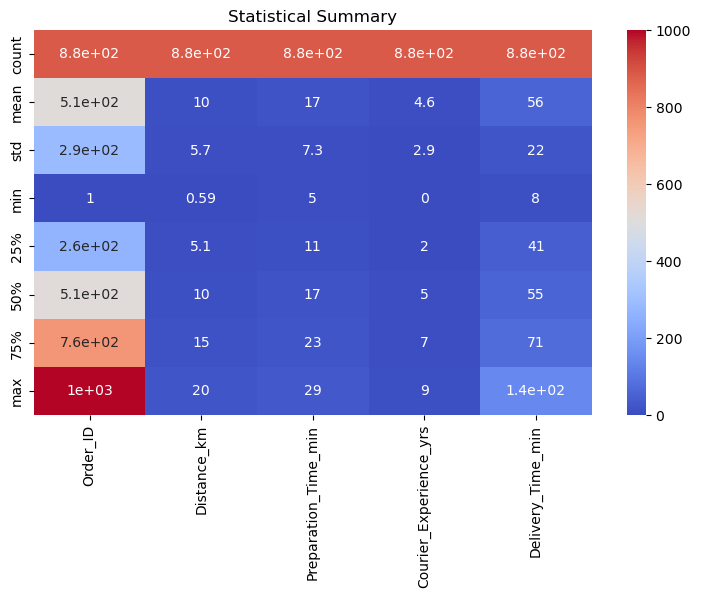

In [9]:
summary=data.describe()
plt.figure(figsize=(9, 5))
sns.heatmap(summary, annot=True, cmap='coolwarm')
plt.title('Statistical Summary')
plt.show()

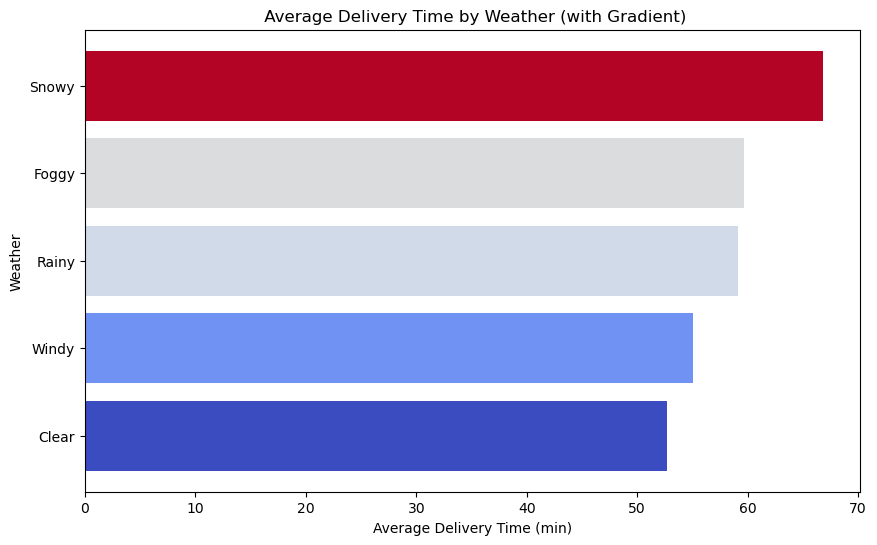

In [10]:
data_grouped = data.groupby('Weather')['Delivery_Time_min'].mean().sort_values()

colors = plt.cm.coolwarm((data_grouped.values - data_grouped.values.min()) / (data_grouped.values.max() - data_grouped.values.min()))

plt.figure(figsize=(10, 6))
plt.barh(data_grouped.index, data_grouped.values, color=colors)
plt.title(" Average Delivery Time by Weather (with Gradient)")
plt.xlabel("Average Delivery Time (min)")
plt.ylabel("Weather")
plt.show()

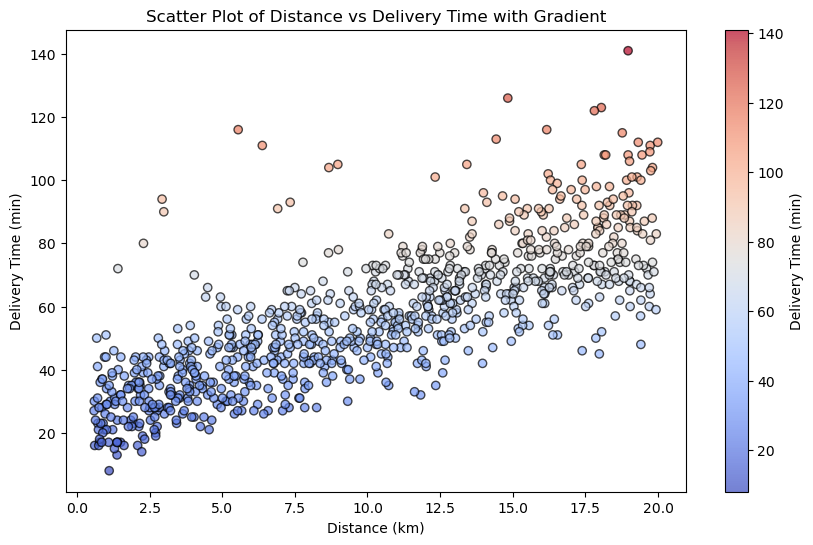

In [11]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(
    data['Distance_km'],
    data['Delivery_Time_min'],
    c=data['Delivery_Time_min'],  
    cmap='coolwarm', 
    alpha=0.7,
    edgecolor='k'
)

plt.colorbar(sc, label='Delivery Time (min)')
plt.title("Scatter Plot of Distance vs Delivery Time with Gradient")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time (min)")
plt.show()

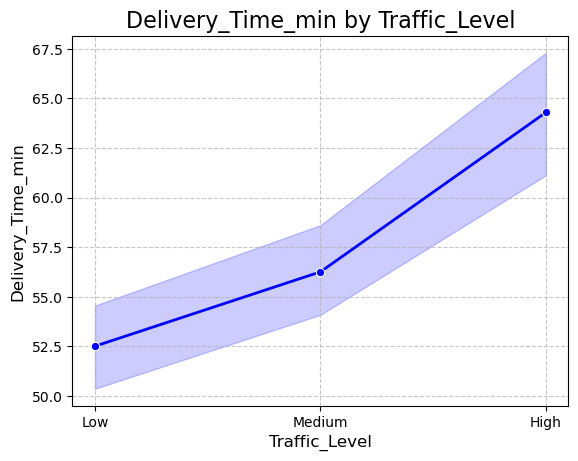

In [12]:
sns.lineplot(x='Traffic_Level', y='Delivery_Time_min', data=data, marker='o', color='blue', linewidth=2)

plt.title('Delivery_Time_min by Traffic_Level', fontsize=16)
plt.xlabel('Traffic_Level', fontsize=12)
plt.ylabel('Delivery_Time_min', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7) 

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12352\2393598018.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time_of_Day', y='Delivery_Time_min', data=data, palette='Blues')


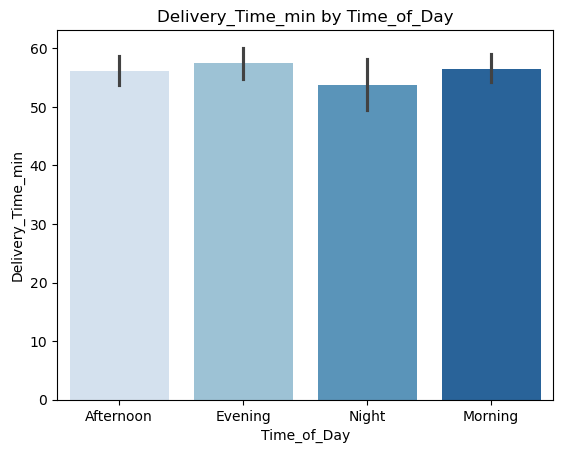

In [13]:
sns.barplot(x='Time_of_Day', y='Delivery_Time_min', data=data, palette='Blues')

plt.title('Delivery_Time_min by Time_of_Day')
plt.xlabel('Time_of_Day')
plt.ylabel('Delivery_Time_min')

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_12352\3662604459.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Vehicle_Type', y='Delivery_Time_min', data=data, palette='Blues')


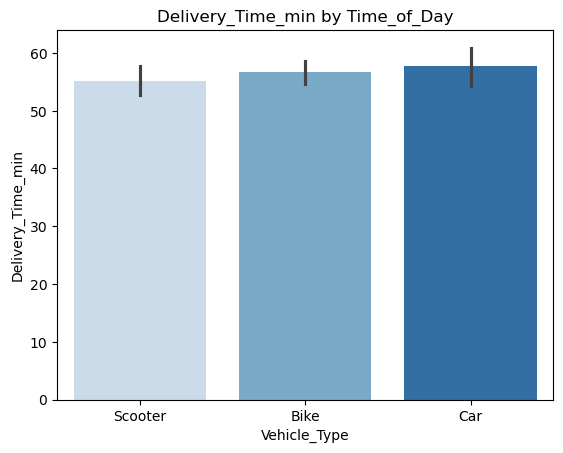

In [14]:
sns.barplot(x='Vehicle_Type', y='Delivery_Time_min', data=data, palette='Blues')

plt.title('Delivery_Time_min by Time_of_Day')
plt.xlabel('Vehicle_Type')
plt.ylabel('Delivery_Time_min')

plt.show()

In [17]:
minmax = MinMaxScaler()
data_scaled = minmax.fit_transform(data)

data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

print(data_scaled_df.head())

   Distance_km  Weather  Traffic_Level  Time_of_Day  Vehicle_Type  \
0     0.378351     1.00            0.5     0.000000           1.0   
1     0.815979     0.00            1.0     0.333333           0.0   
2     0.460309     0.25            0.5     1.000000           1.0   
3     0.353093     0.50            1.0     0.000000           1.0   
4     0.950515     0.00            0.5     0.666667           0.0   

   Preparation_Time_min  Courier_Experience_yrs  Delivery_Time_min  
0              0.291667                0.111111           0.263158  
1              0.625000                0.222222           0.571429  
2              0.958333                0.111111           0.383459  
3              0.000000                0.111111           0.218045  
4              0.458333                0.555556           0.451128  


In [18]:
y=data['Delivery_Time_min']
X=data.drop(['Delivery_Time_min'],axis=1)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42,shuffle=True)

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = model.predict(x_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 92.12916786377353
R² Score: 0.7745910867442177
